# Assignment #B: 图 (1/4)

Updated 2031 GMT+8 Nov 17, 2025

2025 fall, Complied by <mark>胡孝齐 物理学院</mark>





>**说明：**
>
>1. **解题与记录：**
>
>     对于每一个题目，请提供其解题思路（可选），并附上使用Python或C++编写的源代码（确保已在OpenJudge， Codeforces，LeetCode等平台上获得Accepted）。请将这些信息连同显示“Accepted”的截图一起填写到下方的作业模板中。（推荐使用Typora https://typoraio.cn 进行编辑，当然你也可以选择Word。）无论题目是否已通过，请标明每个题目大致花费的时间。
>
>2. **提交安排：**提交时，请首先上传PDF格式的文件，并将.md或.doc格式的文件作为附件上传至右侧的“作业评论”区。确保你的Canvas账户有一个清晰可见的本人头像，提交的文件为PDF格式，并且“作业评论”区包含上传的.md或.doc附件。
> 
>3. **延迟提交：**如果你预计无法在截止日期前提交作业，请提前告知具体原因。这有助于我们了解情况并可能为你提供适当的延期或其他帮助。  
>
>请按照上述指导认真准备和提交作业，以保证顺利完成课程要求。



## 1. 题目

### E07218: 献给阿尔吉侬的花束

bfs, http://cs101.openjudge.cn/practice/07218/

思路：
15min,bfs经典


代码：

```python
from collections import deque
T=int(input().strip())
for _ in range(T):
    R,C=map(int,input().strip().split())
    l=[]
    for i in range(R):
        li=input().strip()
        l.append(li)
        for j in range(C):
            if li[j]=='S':
                sr,sc=i,j
    history=[[float('inf')]*C for i in range(R)]
    history[sr][sc]=0
    q=deque()
    q.append((sr,sc,0))
    time=0
    while q:
        r,c,steps=q.popleft()
        if l[r][c]=='E':
            time=steps
            break
        to_visit=[[r+1,c],[r-1,c],[r,c+1],[r,c-1]]
        for nr,nc in to_visit:
            if 0<=nr<R and 0<=nc<C:
                if steps+1<history[nr][nc] and l[nr][nc]!='#':
                    q.append((nr,nc,steps+1))
                    history[nr][nc]=steps+1
    if time==0:
        print('oop!')
    else:
        print(time)
```



代码运行截图 <mark>（至少包含有"Accepted"）</mark>
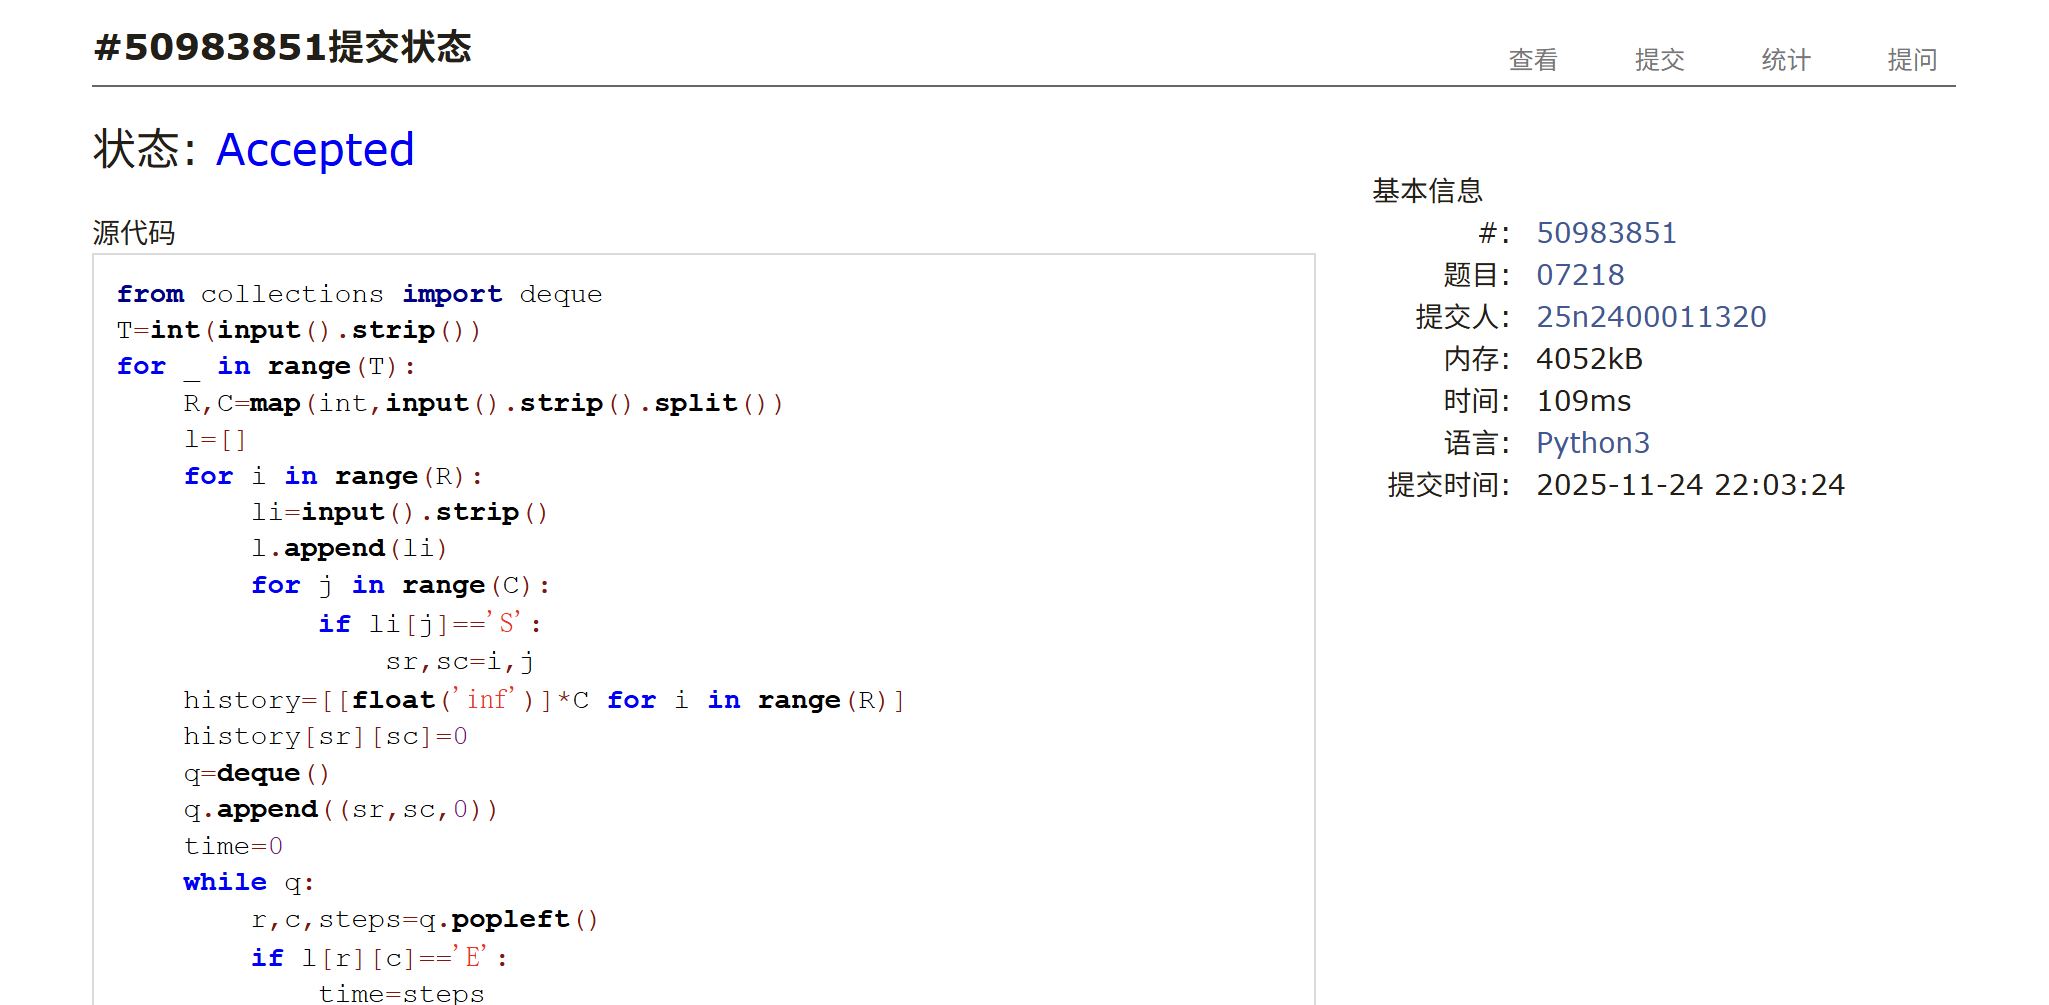




### M27925: 小组队列

dict, queue, http://cs101.openjudge.cn/practice/27925/


思路：
我一开始写的代码超时了，后面问了ai发现只要把总队列和小组内部队列分别排就好了


代码：

```python
from collections import deque

t = int(input().strip())
member_to_team = {}

for i in range(t):
    team = input().strip().split()
    for member in team:
        member_to_team[member] = i

# 主队列：按顺序存储小组ID（包含散客组）
main_queue = deque()  # 存储小组ID
# 每个小组的内部队列
group_queues = {}     # {小组ID: deque()}

while True:
    command = input().strip().split()
    
    if command[0] == 'DEQUEUE':
        current_group = main_queue[0]
        person = group_queues[current_group].popleft()
        
        if not group_queues[current_group]:
            main_queue.popleft()
        
        print(person)
    
    elif command[0] == 'ENQUEUE':
        number = command[1]
        
        # 确定所属小组，散客用-1，但每个散客都应该有独立ID
        # 为了简化，我们可以将每个散客看作一个独立的"单人小组"
        person_group = member_to_team.get(number, number)  # 用编号作为散客组ID
        
        if person_group not in group_queues:
            group_queues[person_group] = deque()
        
        group_queues[person_group].append(number)
        
        if person_group not in list(main_queue):
            main_queue.append(person_group)
    
    elif command[0] == 'STOP':
        break
```



代码运行截图 <mark>（至少包含有"Accepted"）</mark>
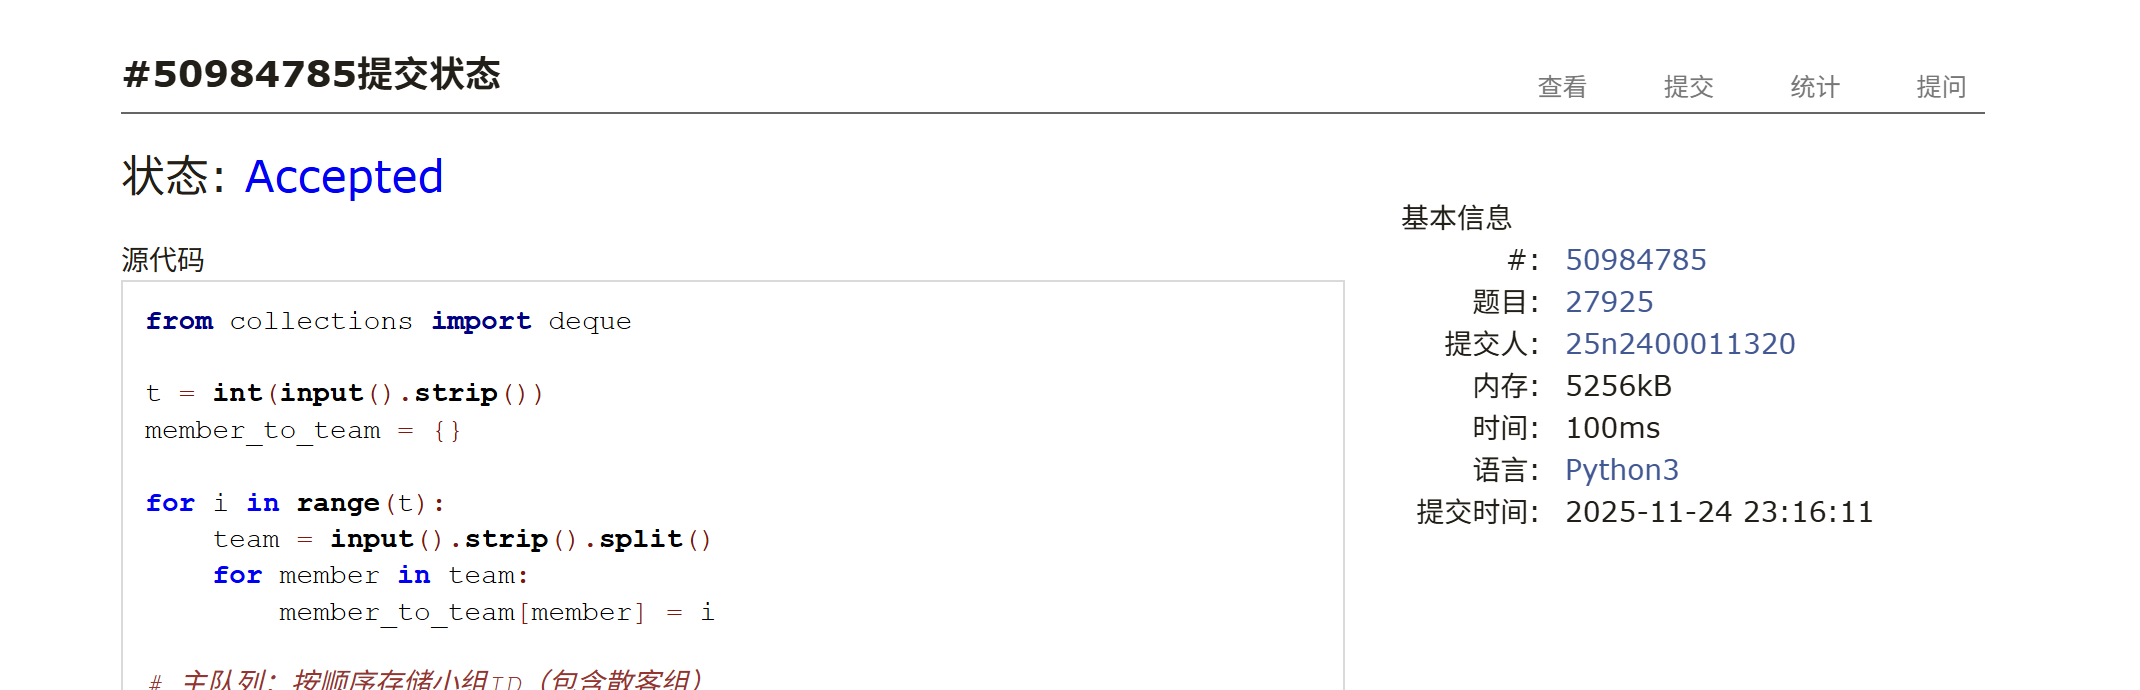




### M04089: 电话号码

trie, http://cs101.openjudge.cn/practice/04089/

思路：
一开始的字典方法超时了，没想到这种题目还能用树


代码：

```python
class TrieNode:
    def __init__(self):
        self.children = {}
        self.is_end = False

def check_consistency(phone_numbers):
    """
    检查电话号码是否一致（无前缀关系）
    """
    root = TrieNode()
    
    for number in phone_numbers:
        current = root
        is_prefix_of_existing = False
        
        # 遍历当前号码的每一位数字
        for digit in number:
            # 情况1：在遍历过程中遇到已结束的节点
            # 说明当前号码包含了之前某个号码作为前缀
            if current.is_end:
                is_prefix_of_existing = True
                break
            
            if digit not in current.children:
                current.children[digit] = TrieNode()
            
            current = current.children[digit]
        
        # 检查冲突情况
        if is_prefix_of_existing:
            # 当前号码是之前某个号码的前缀
            return False
        
        if current.is_end:
            # 当前号码与之前某个号码完全相同（或之前号码是当前的前缀）
            # 这种情况在题目中也应该返回False
            return False
        
        if current.children:
            # 当前路径已经有更长的号码，说明之前插入的号码是当前号码的前缀
            return False
        
        # 标记当前路径为完整号码
        current.is_end = True
    
    return True


t = int(input().strip())
    
for _ in range(t):
    n = int(input().strip())
    phone_numbers = []
    for _ in range(n):
        phone_numbers.append(input().strip())
        
    if check_consistency(phone_numbers):
        print("YES")
    else:
        print("NO")
```



代码运行截图 <mark>（至少包含有"Accepted"）</mark>
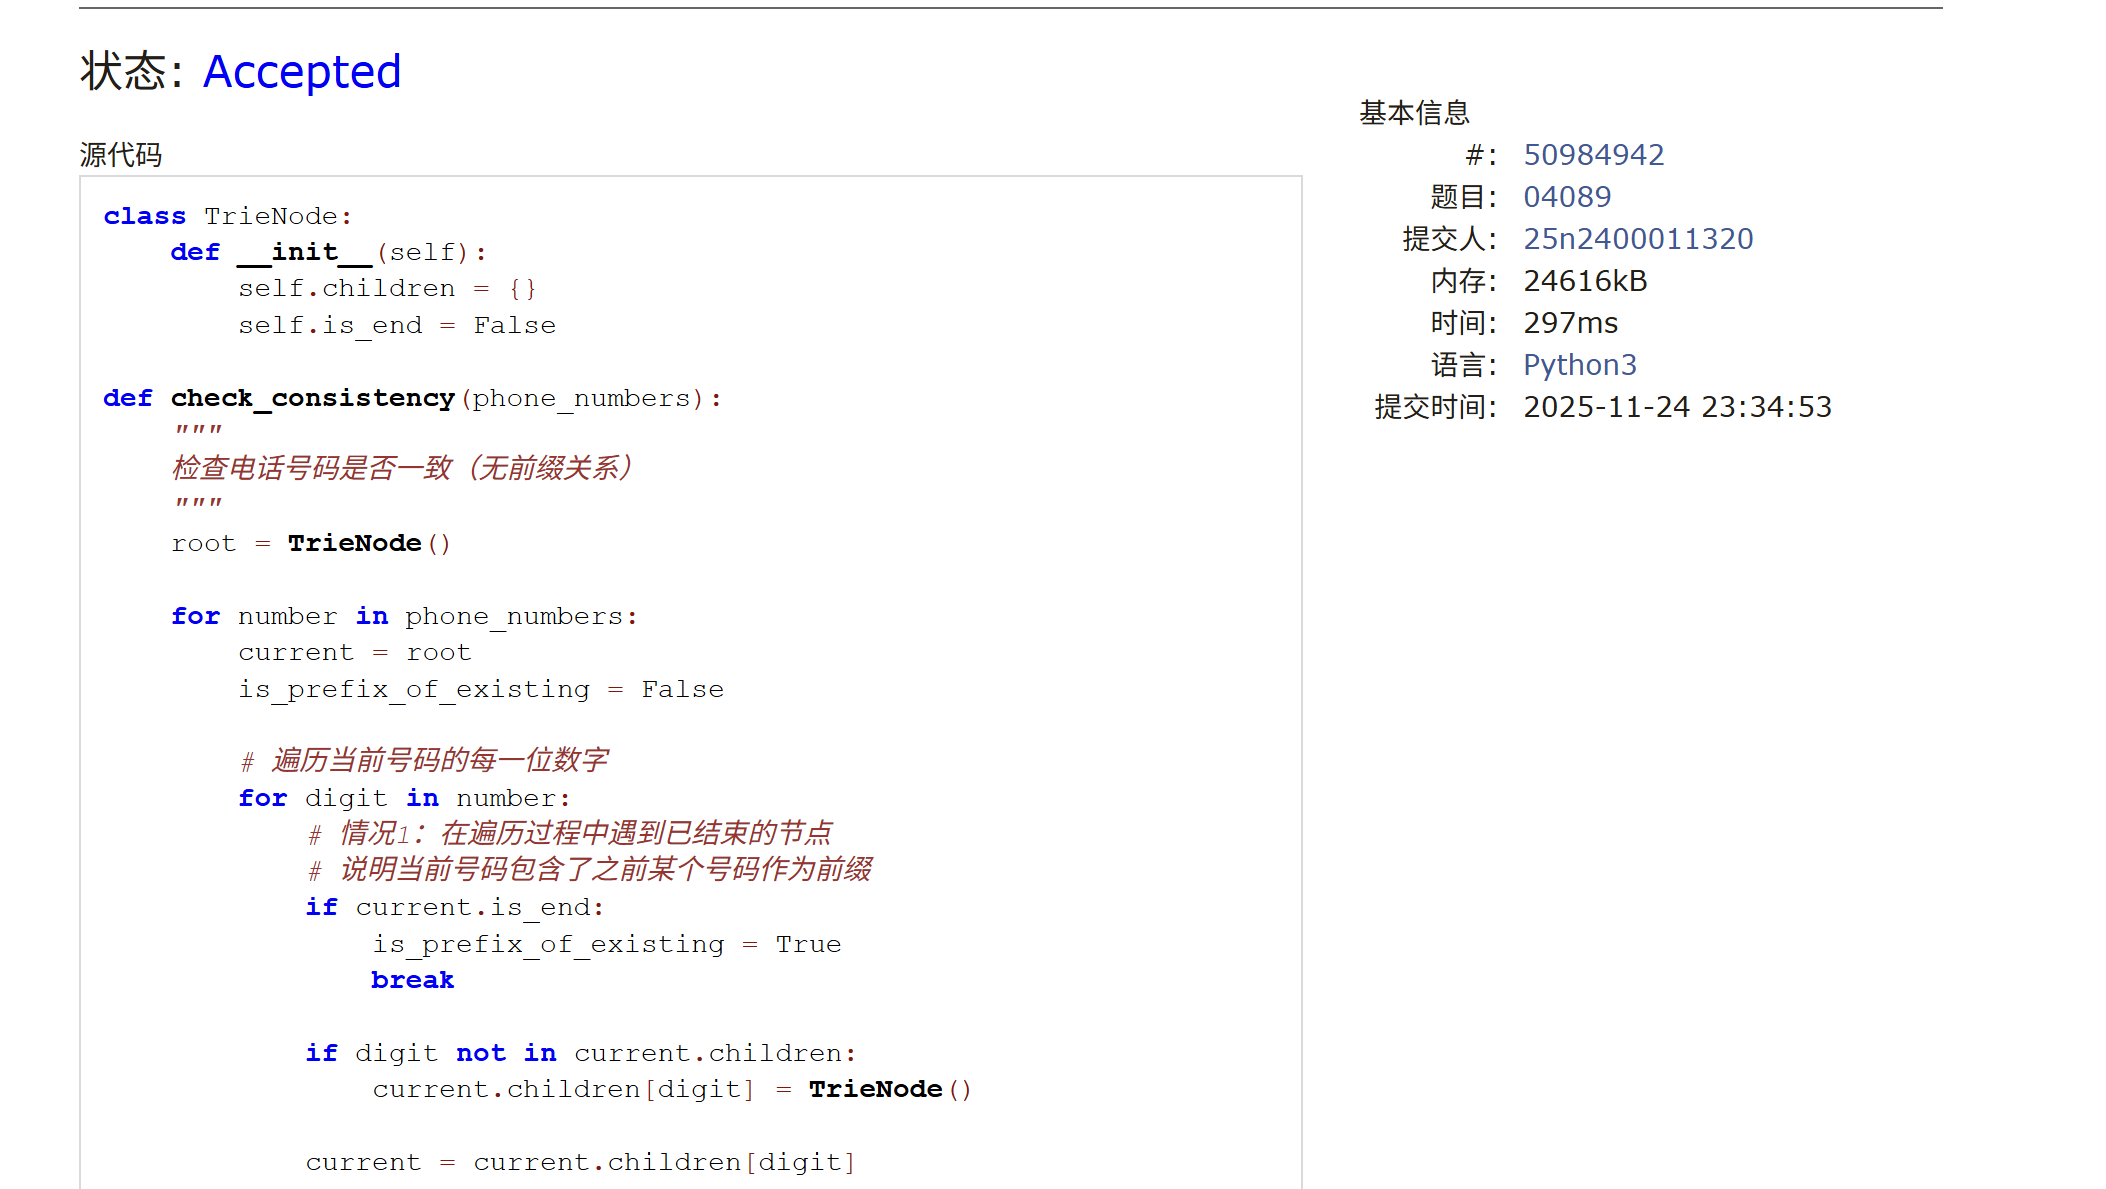




### M3532.针对图的路径存在性查询I

disjoint set, https://leetcode.cn/problems/path-existence-queries-in-a-graph-i/

思路：
由于已经完成排序，因此直接遍历然后判断是否连续即可完成分组


代码

```python
class Solution:
    def pathExistenceQueries(self, n: int, nums: List[int], maxDiff: int, queries: List[List[int]]) -> List[bool]:
        dic={}
        ind=0
        dic[nums[0]]=0
        for i in range(n-1):
            if nums[i+1]-nums[i]<=maxDiff:
                dic[nums[i+1]]=ind
            else:
                ind+=1
                dic[nums[i+1]]=ind
        answer=[]
        for i,j in queries:
            if dic[nums[i]]==dic[nums[j]]:
                answer.append(True)
            else:
                answer.append(False)
        return answer

```



代码运行截图<mark>（至少包含有"Accepted"）</mark>
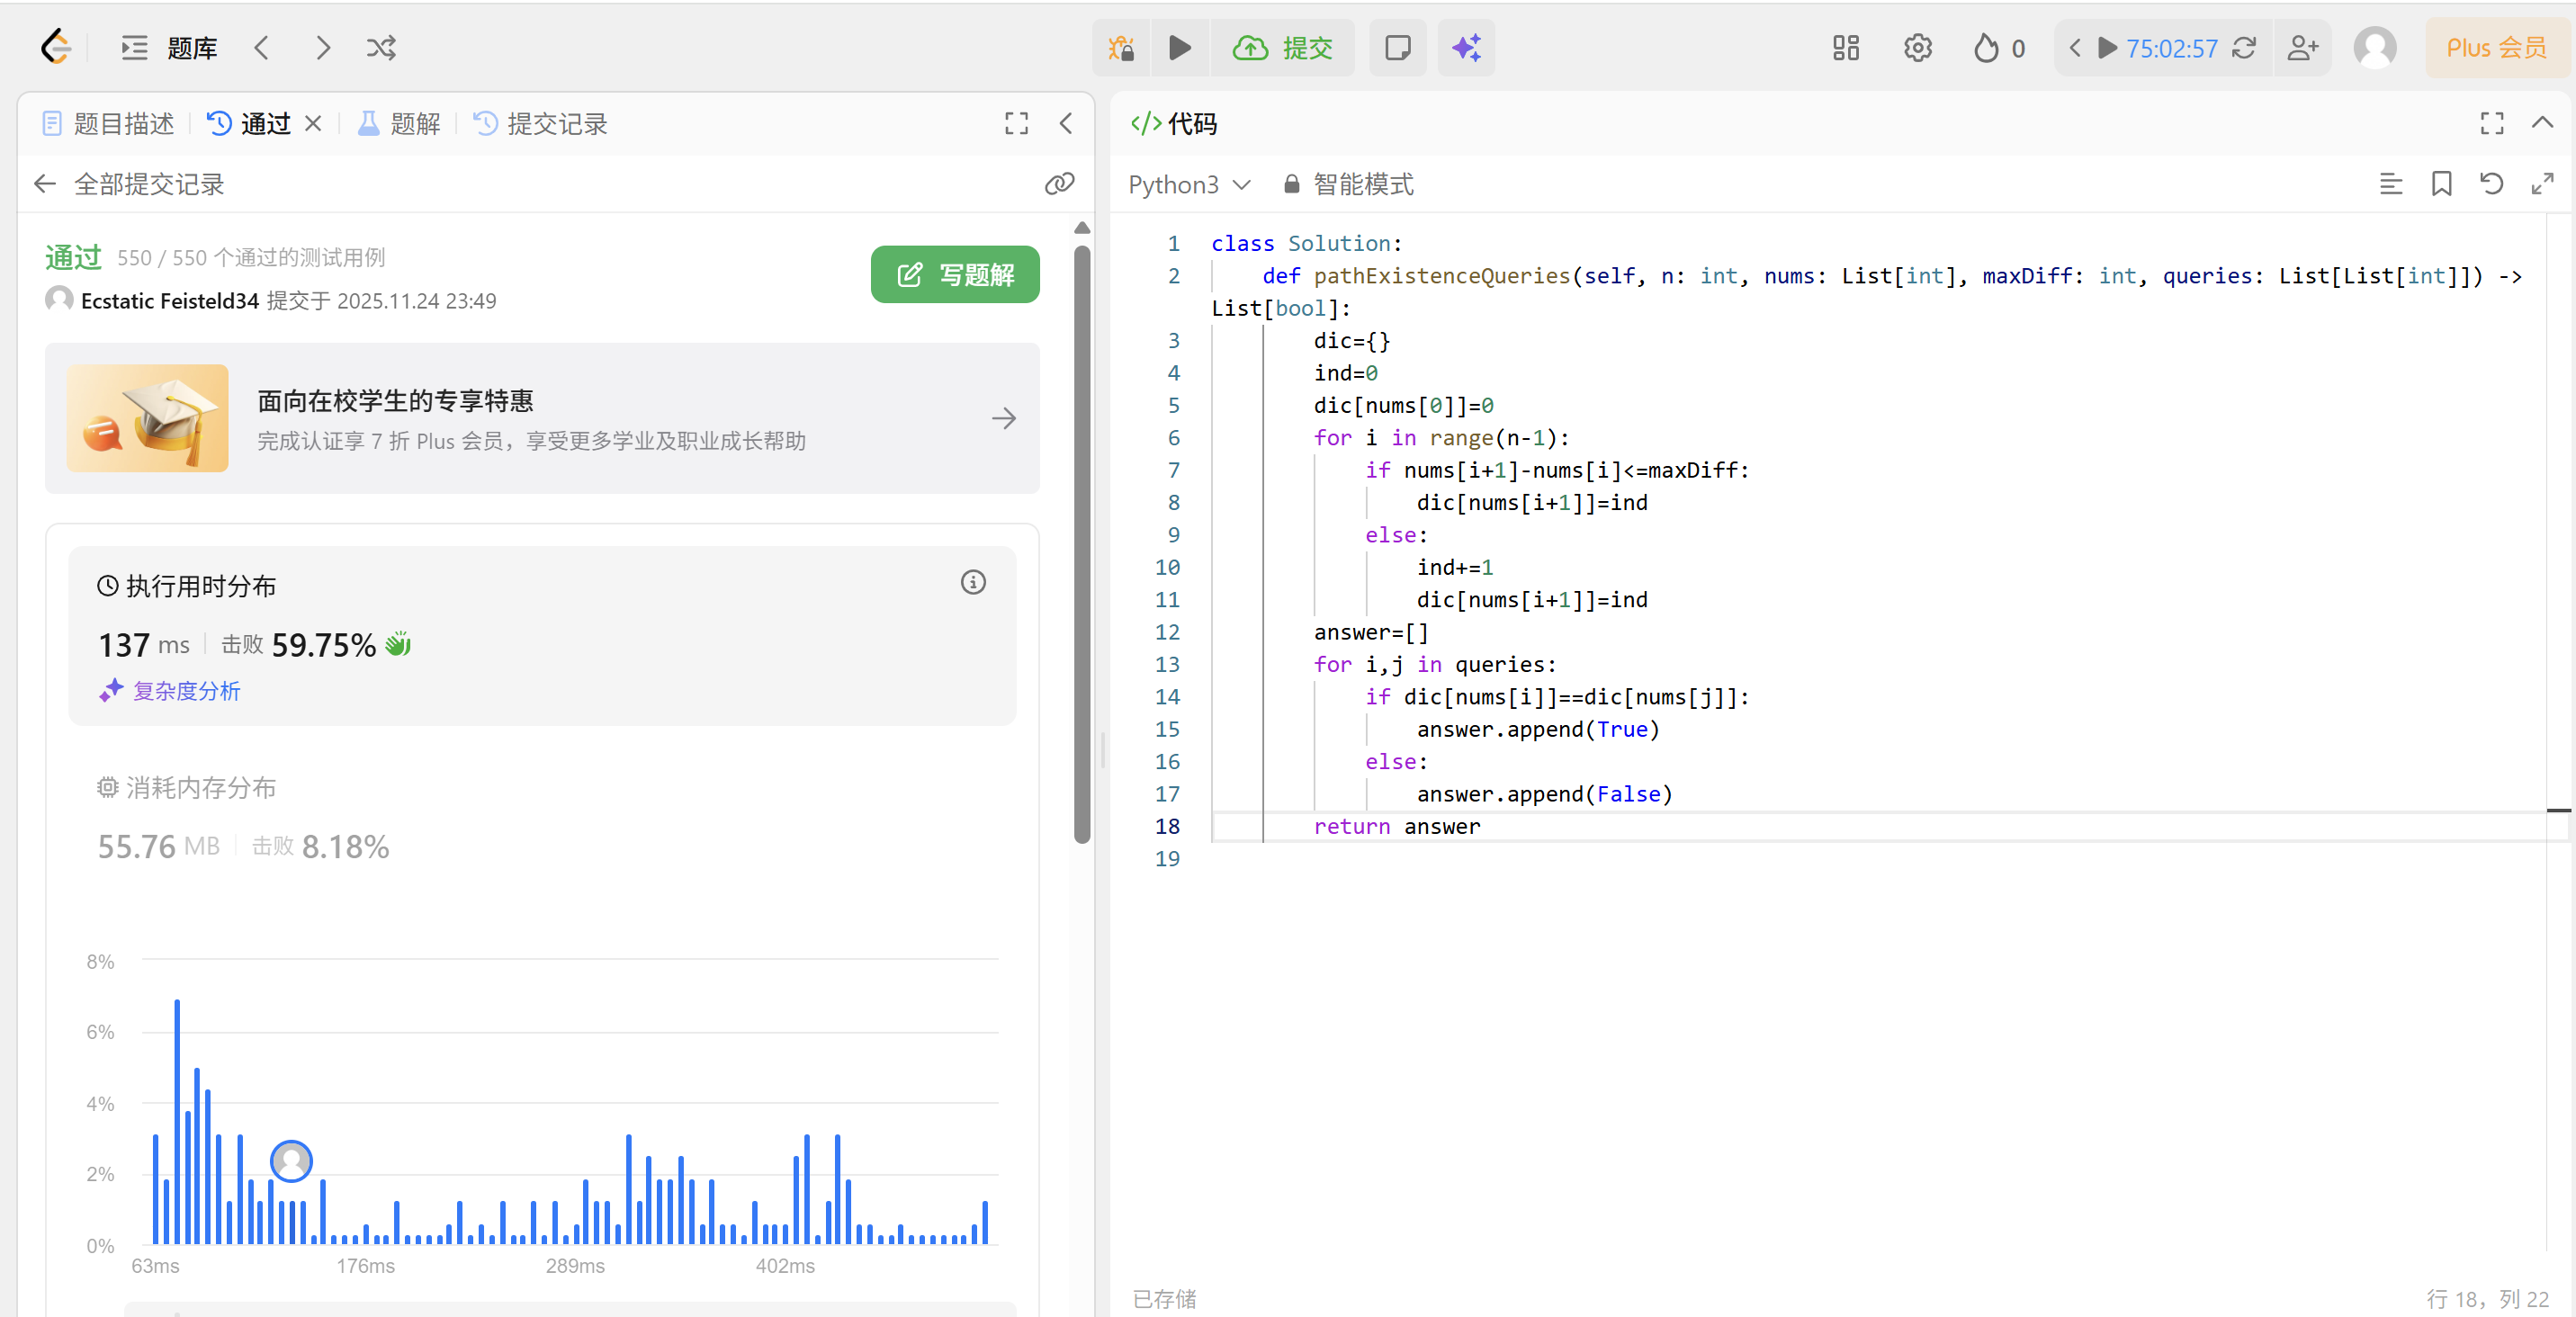




### M19943: 图的拉普拉斯矩阵

OOP, graph, implementation, http://cs101.openjudge.cn/pctbook/E19943/

要求创建Graph, Vertex两个类，建图实现。

思路：



代码

```python

```



代码运行截图<mark>（至少包含有"Accepted"）</mark>





### T25353: 排队

http://cs101.openjudge.cn/pctbook/T25353/

思路：



代码：

```python

```



代码运行截图 <mark>（至少包含有"Accepted"）</mark>



## 2. 学习总结和个人收获

初步接触了一些图的题目




